# **IBM Employee Attrition Analysis & Prediction**

In [681]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# **Data Collection**

In [682]:
# Load the dataset
a = pd.read_csv("IBM-HR-Employee-Attrition.csv")

# Copy the data
df = a.copy()

# Take a breif look at the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Basic information**

In [683]:
# Rename columns if needed

# Get the dimensions of the dataframe
df.shape

(1470, 35)

In [684]:
# Get the row names of the dataframe
df.index

RangeIndex(start=0, stop=1470, step=1)

In [685]:
# Get the column names of the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [686]:
# Dimension
df.ndim

2

In [687]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# **Data Cleaning**

In [688]:
# Check any duplicate values present in the dataset

df.duplicated().sum()   # No duplicates

0

In [689]:
# Check any null values present in the dataset

df.isnull().sum()   # No null values

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


<Axes: >

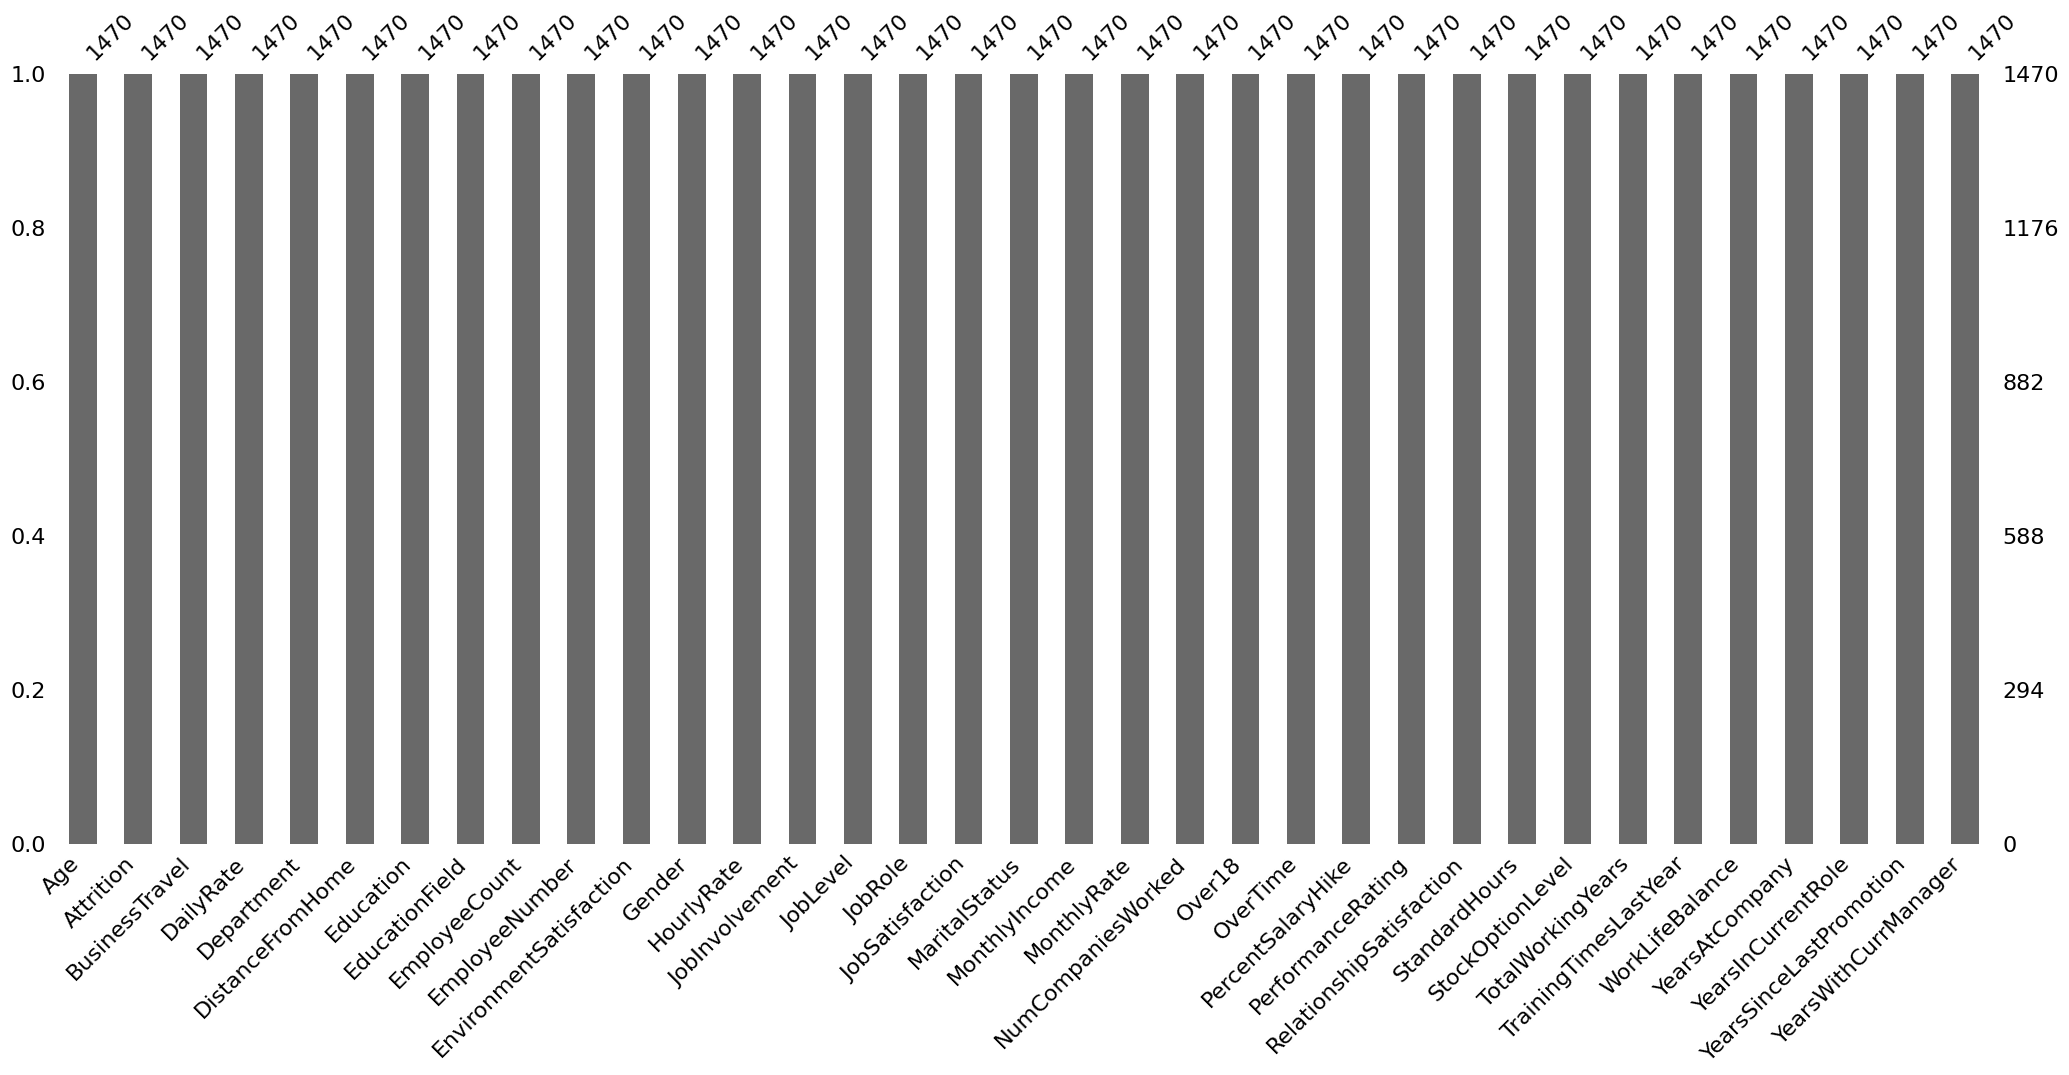

In [690]:
msno.bar(df)   # Check for the null values by graph

<Axes: >

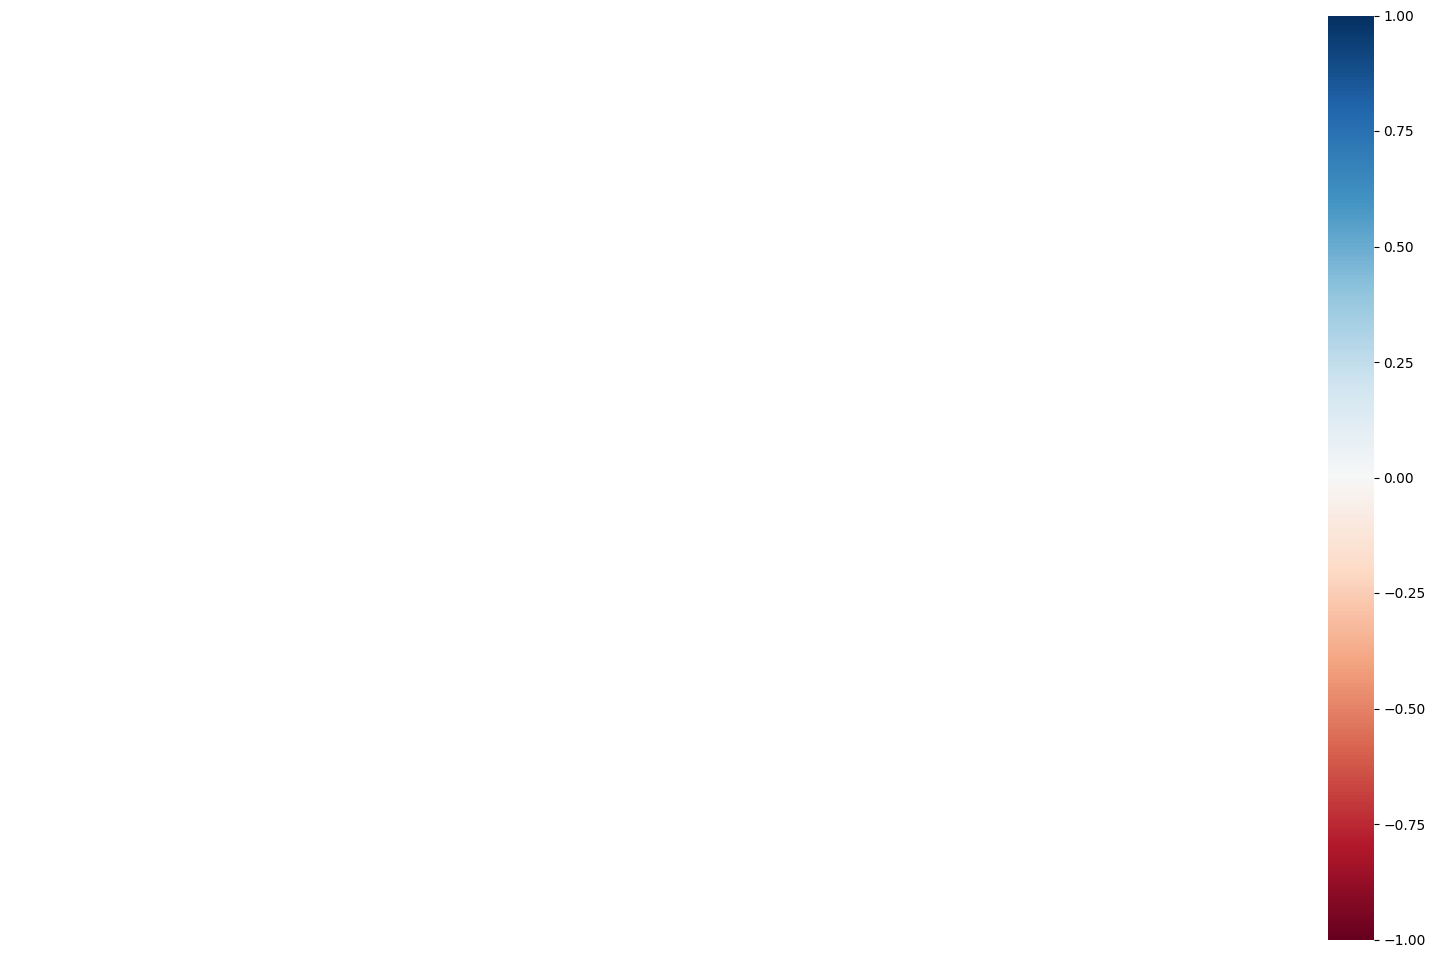

In [691]:
msno.heatmap(df)

In [692]:
df["Left"] = np.where(df["Attrition"] == "Yes",1,0)

# **Outliers**

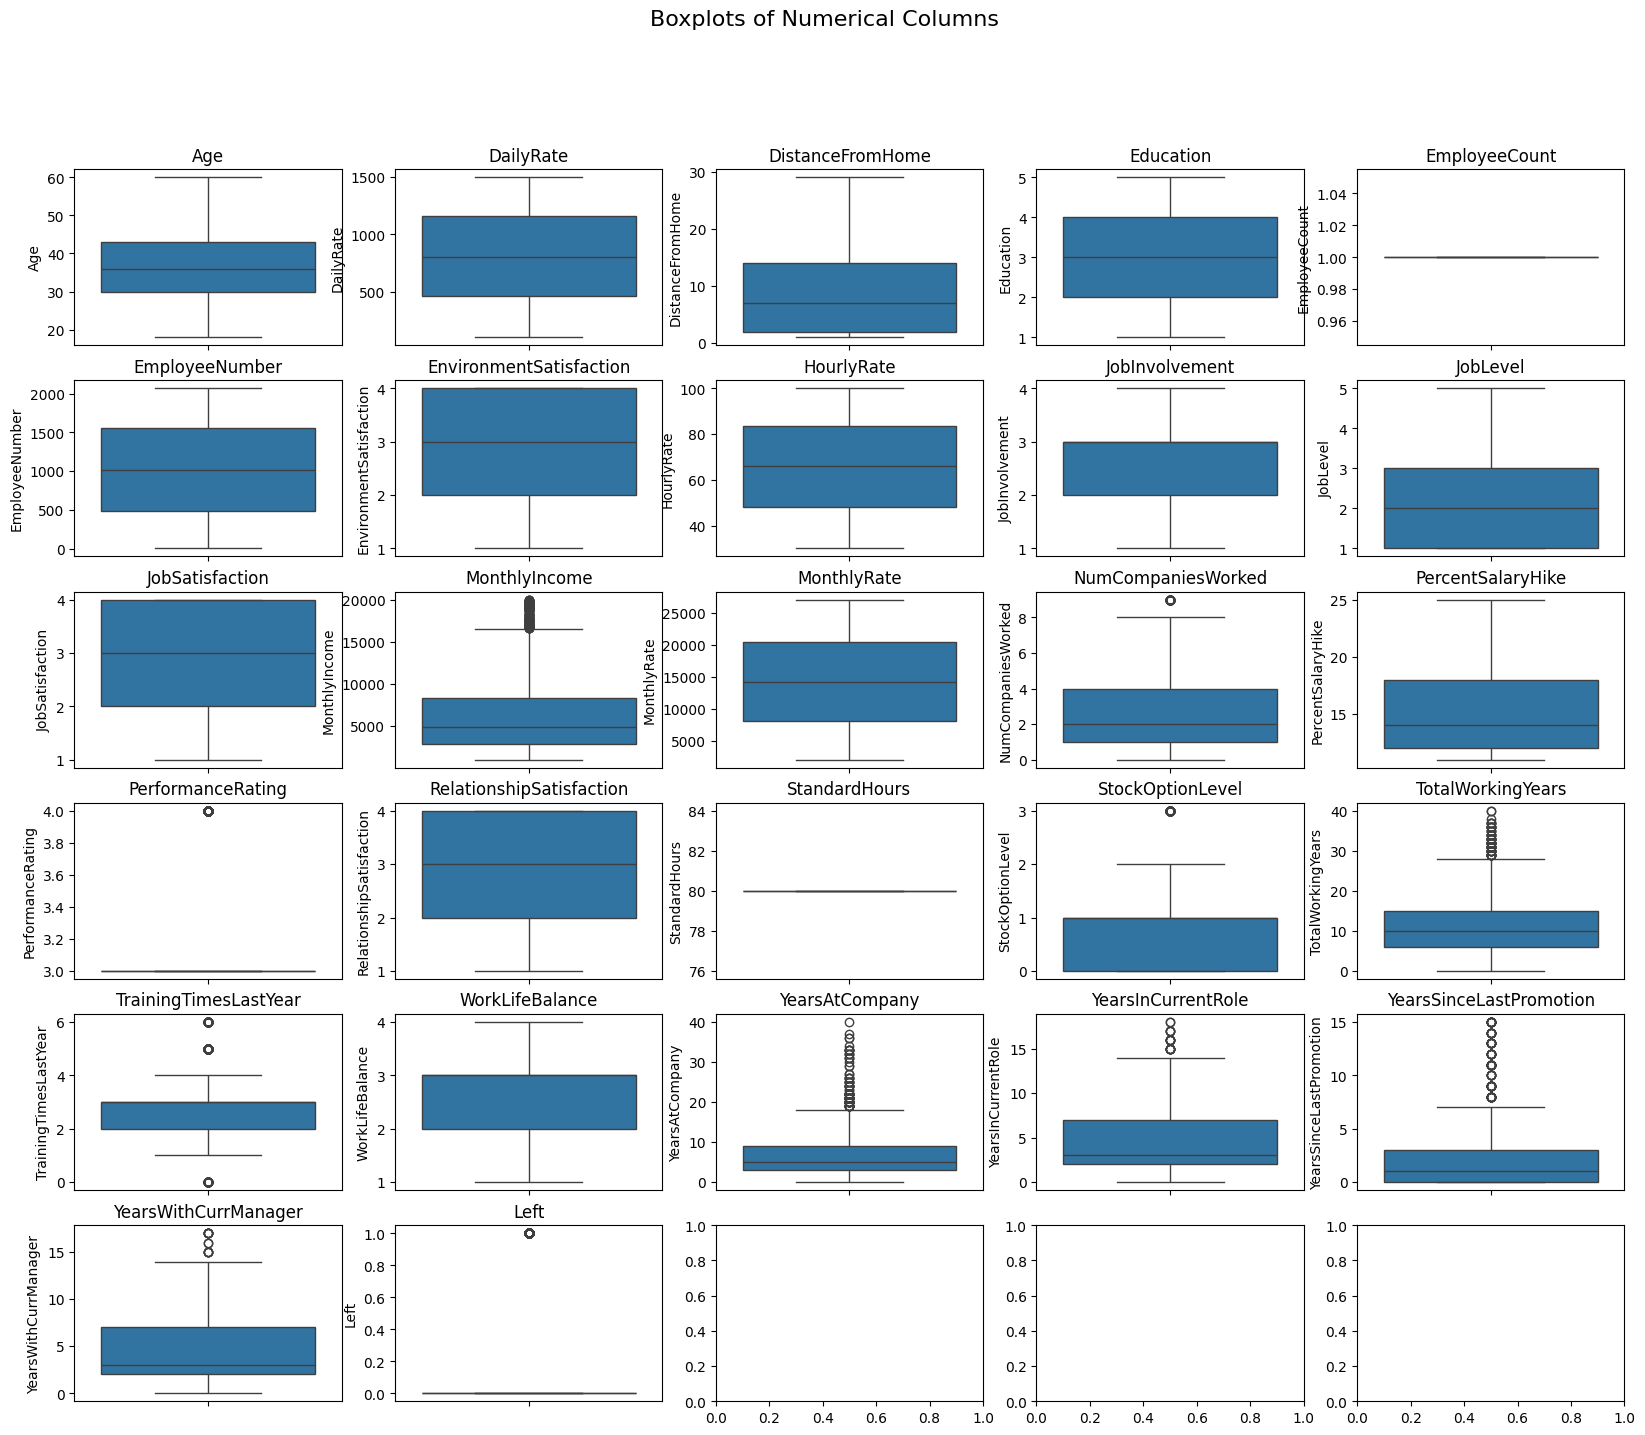

In [693]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(6, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)

In [694]:
# Specify the list of columns you want to handle outliers for
outlier_cols = ['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
# Perform outlier handling for each specified column
for col_name in outlier_cols:
  q1 = df[col_name].quantile(0.25)   # Calculate quartiles and IQR
  q3 = df[col_name].quantile(0.75)
  iqr = q3 - q1
# Define the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[col_name] = np.where(df[col_name] < lower_bound, lower_bound, df[col_name])
  df[col_name] = np.where(df[col_name] > upper_bound, upper_bound, df[col_name])   # Replace outliers with the mean value of the column

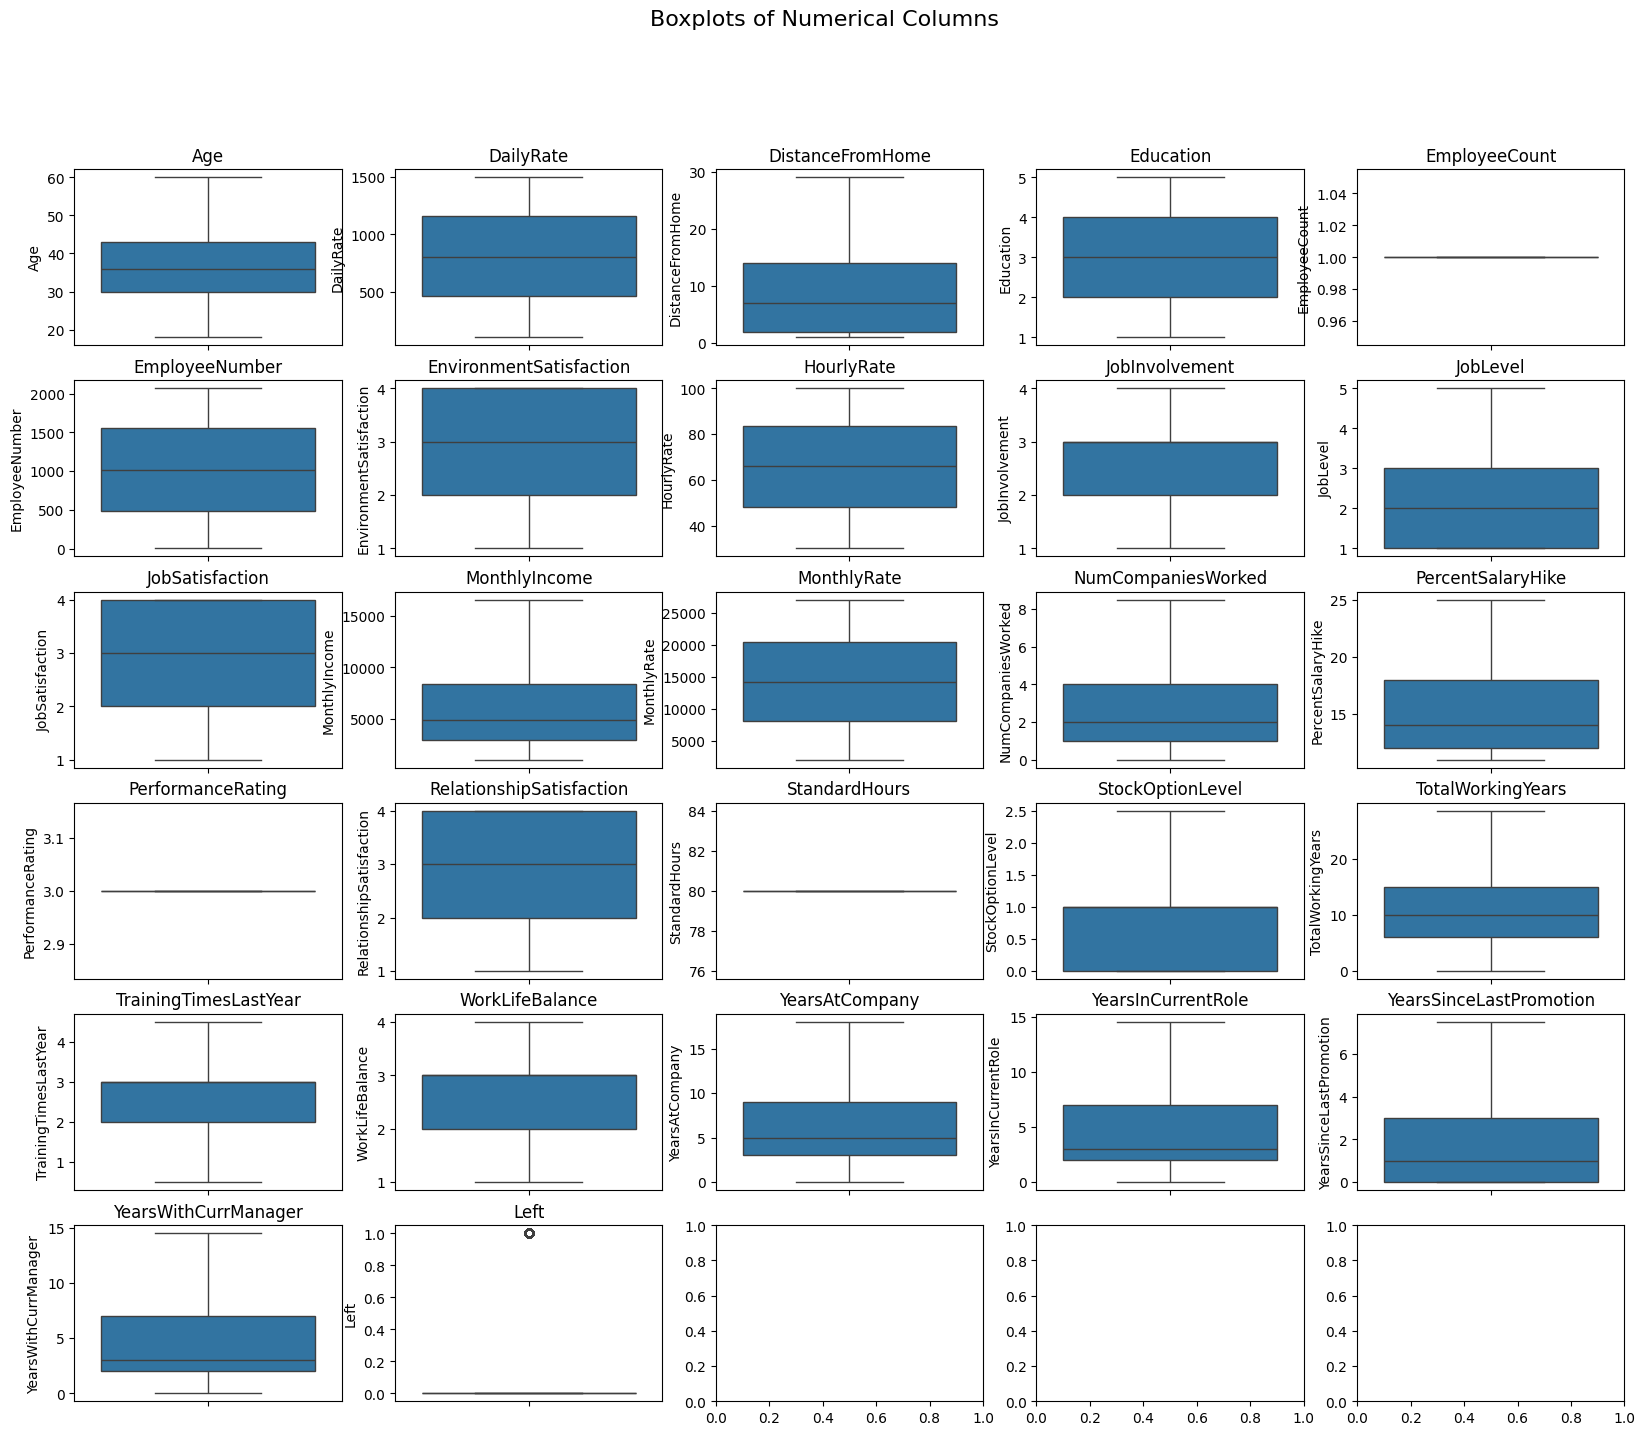

In [695]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(6, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)

# **Exploratory Data Analysis (EDA)**

In [696]:
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Left
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,80.0,0.764966,11.103061,2.710884,2.761224,6.617687,4.207823,1.922789,4.107483,0.161224
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,0.0,0.782312,7.303828,1.037954,0.706476,4.989788,3.555335,2.478222,3.517487,0.367863
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,80.0,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000


# **Data Visualization**

# **Analyizing the variables**

Numerical Variables

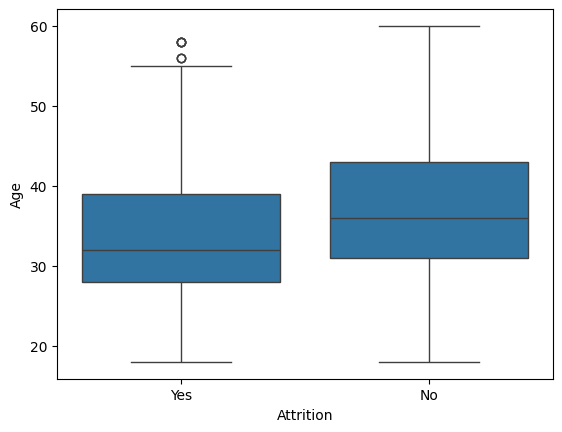

In [697]:
sns.boxplot(x = "Attrition",y = "Age",data = df)
plt.show()

<Axes: xlabel='Age'>

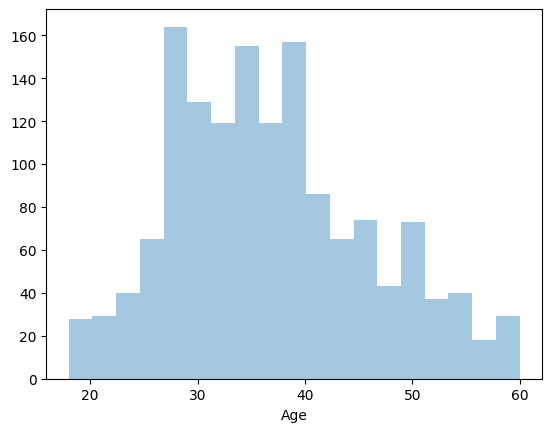

In [698]:
sns.distplot(df["Age"],kde = False)

In [699]:
def NumericalPlots(df,segment_by,target_var = "Attrition"):
    fig, ax = plt.subplots(ncols= 2, figsize = (15,6))
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])    # boxplot
    ax[0].set_title("Comparision plot of " + segment_by + " vs " + target_var)
    ax[1].set_title("Distribution plot of "+segment_by)
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)   # distribution plot
    plt.show()

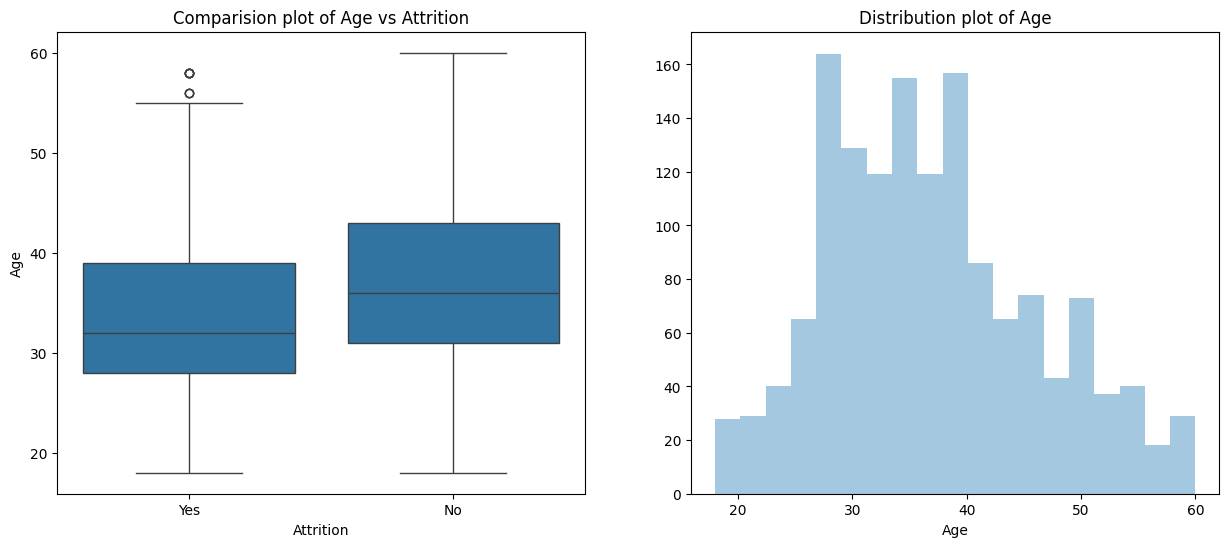

In [700]:
NumericalPlots(df,segment_by = 'Age')

We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.

From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years

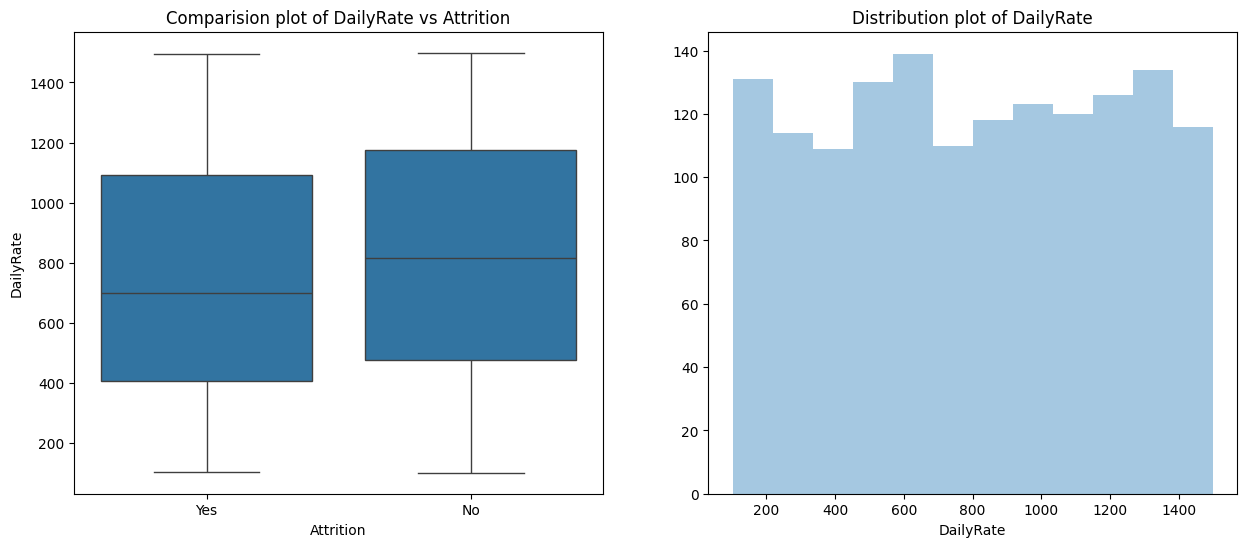

In [701]:
NumericalPlots(df,'DailyRate')

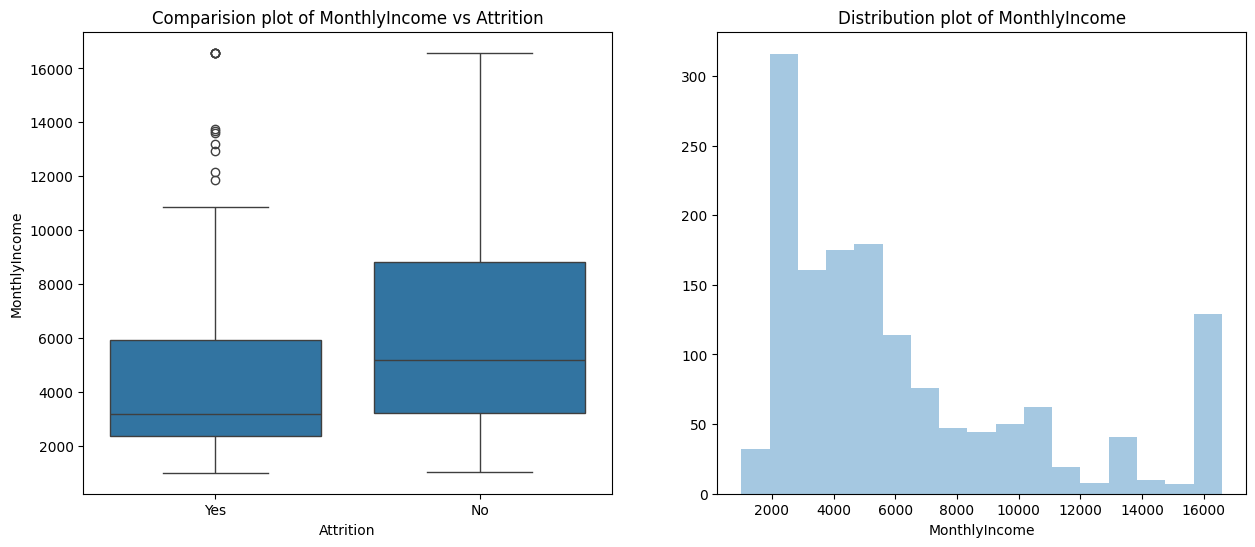

In [702]:
NumericalPlots(df,'MonthlyIncome')

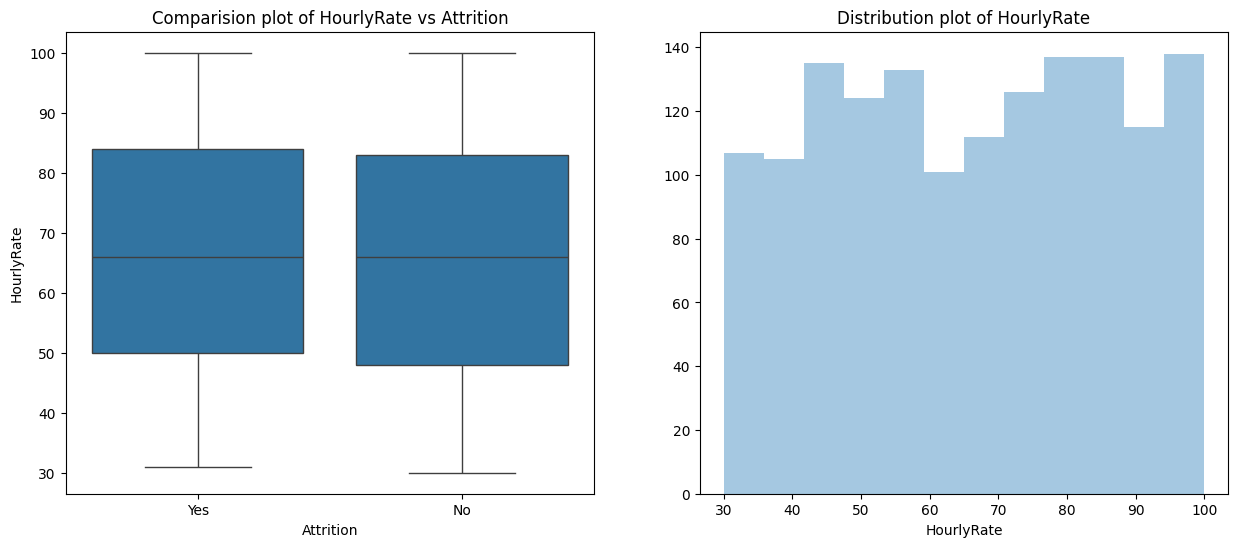

In [703]:
NumericalPlots(df,'HourlyRate')

Employee's who received less rate have left the company.

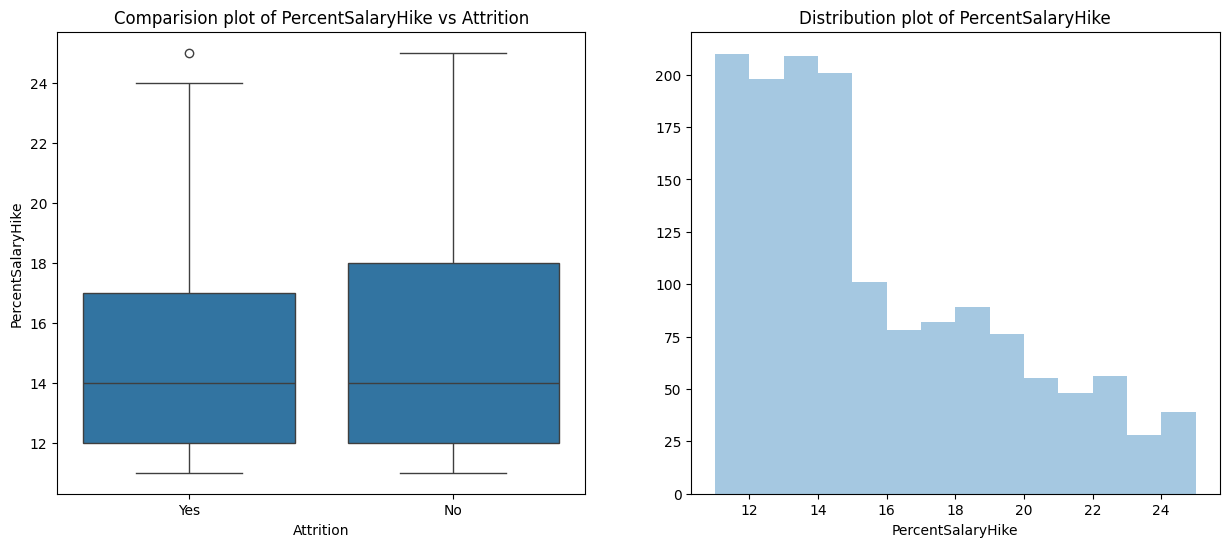

In [704]:
NumericalPlots(df,'PercentSalaryHike')

Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

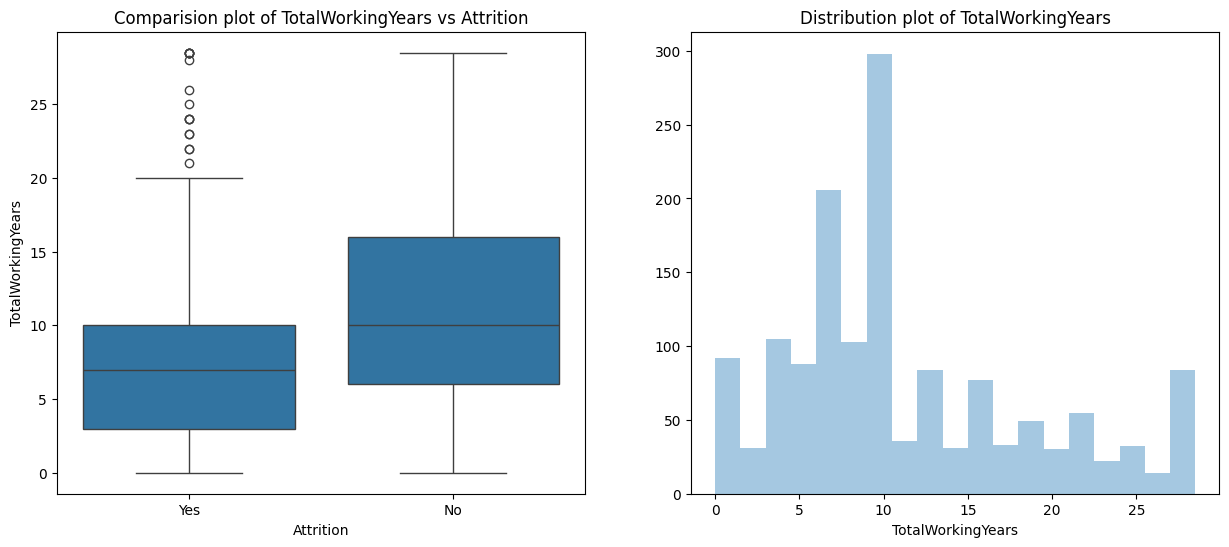

In [705]:
NumericalPlots(df,'TotalWorkingYears')

Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.

Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.

Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

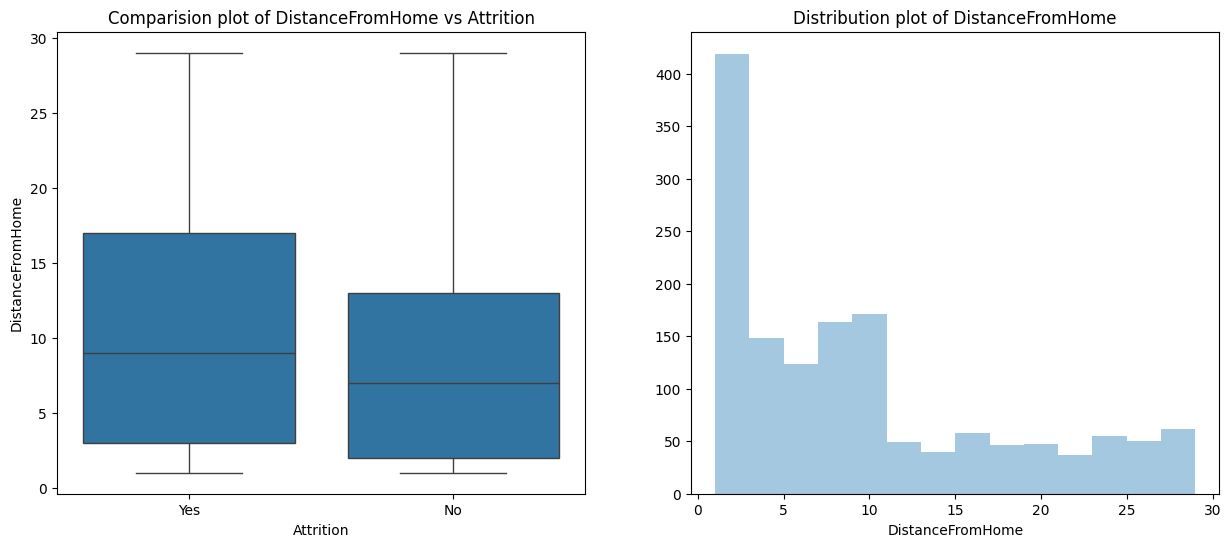

In [706]:
NumericalPlots(df,'DistanceFromHome')

With increase in distance from home, attrition rate also increases.

# **Analyizing the variables**

Categorical Variables

In [707]:
def CategoricalPlots(df, segment_by,invert_axis = False, target_var = "Left"):
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])

    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")

    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,errorbar=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,errorbar=None)

    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

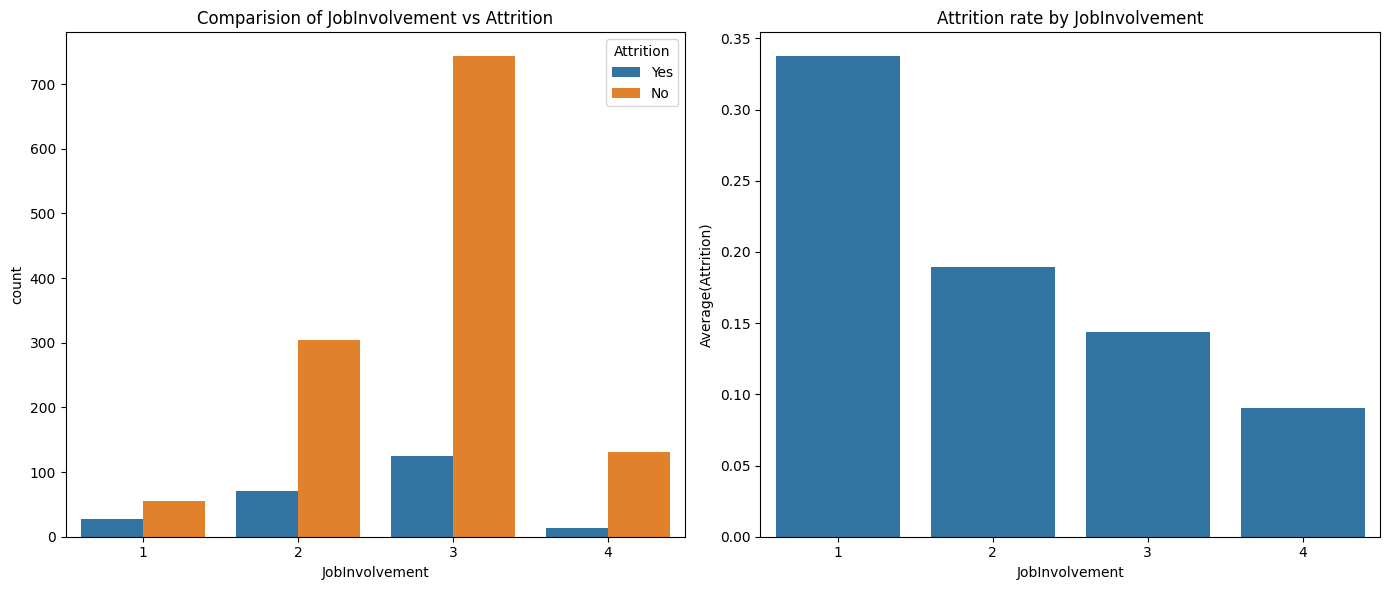

In [708]:
CategoricalPlots(df,'JobInvolvement')

The people who have high job involmenent have higher attrition rate.

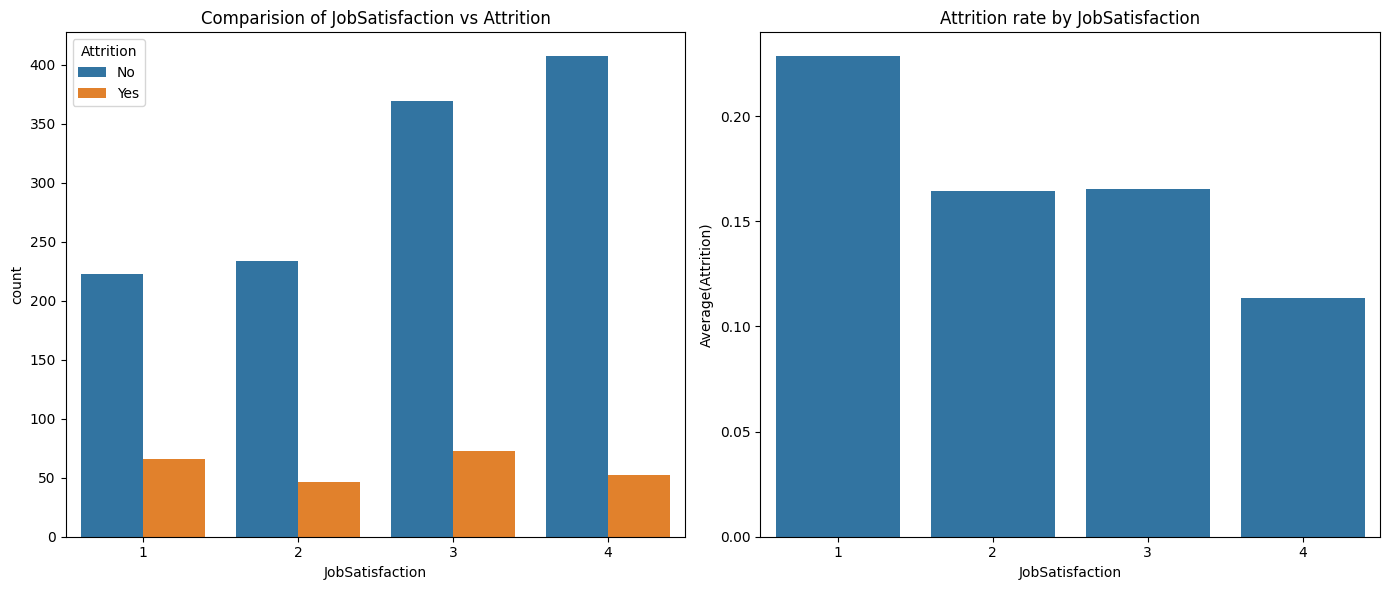

In [709]:
CategoricalPlots(df,'JobSatisfaction')

People with low satisfaction have left the company.

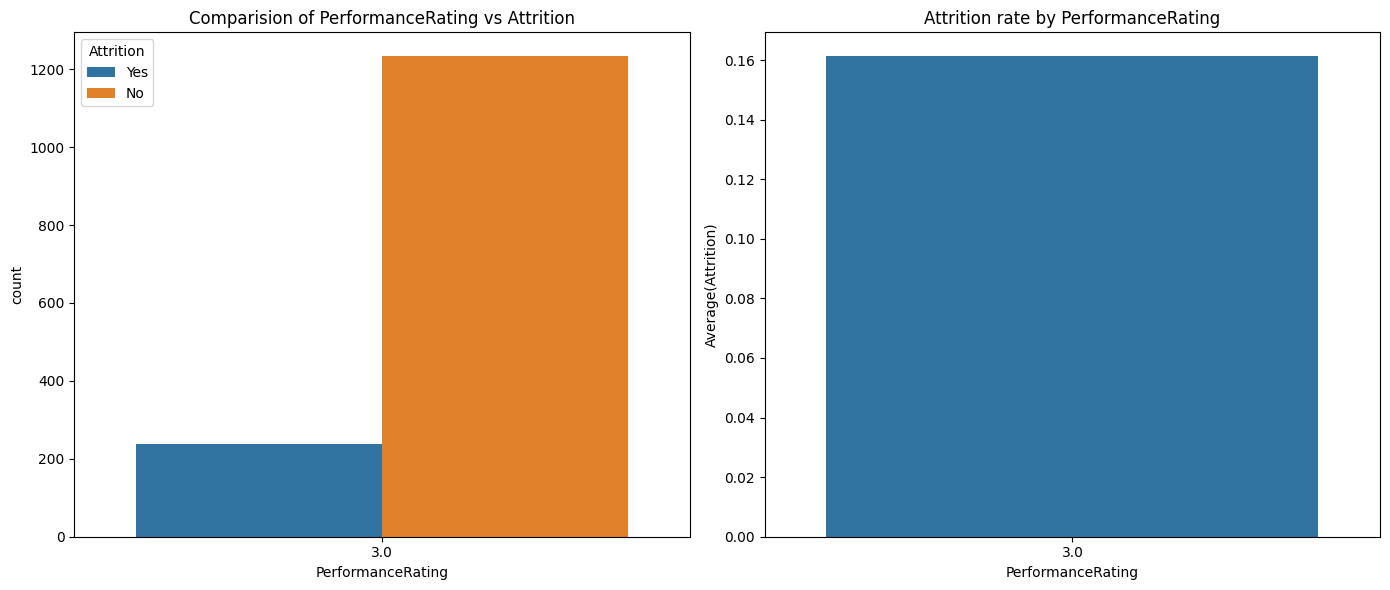

In [710]:
CategoricalPlots(df,'PerformanceRating')

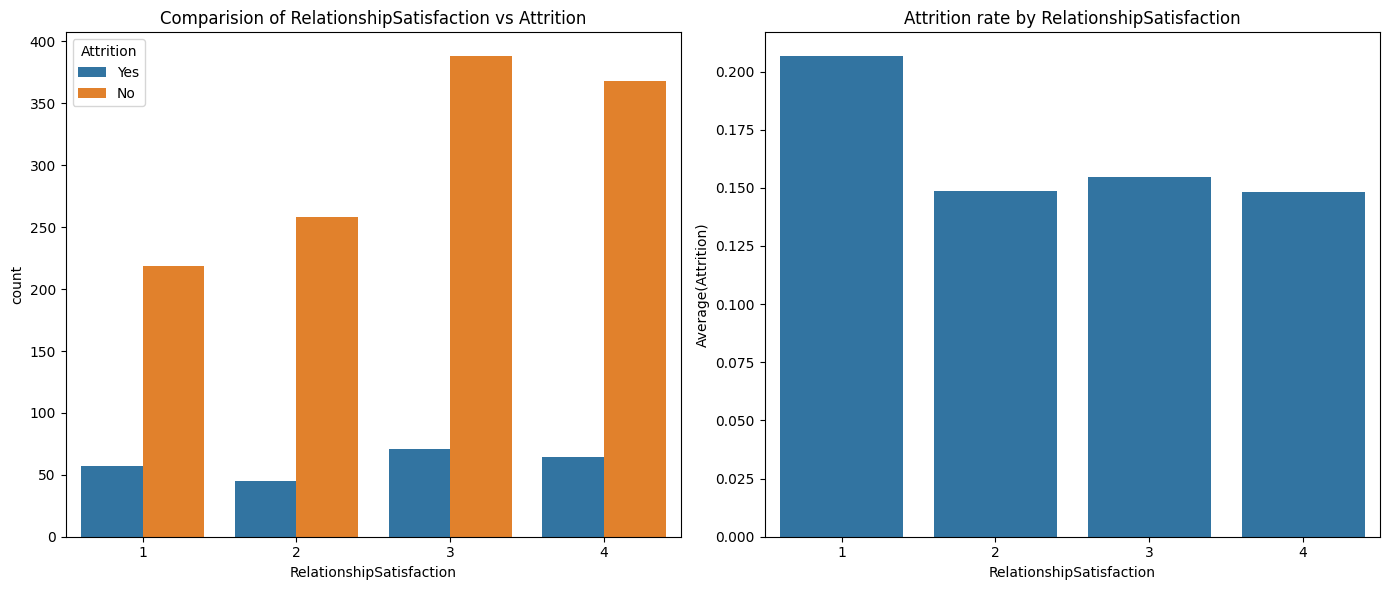

In [711]:
CategoricalPlots(df,'RelationshipSatisfaction')

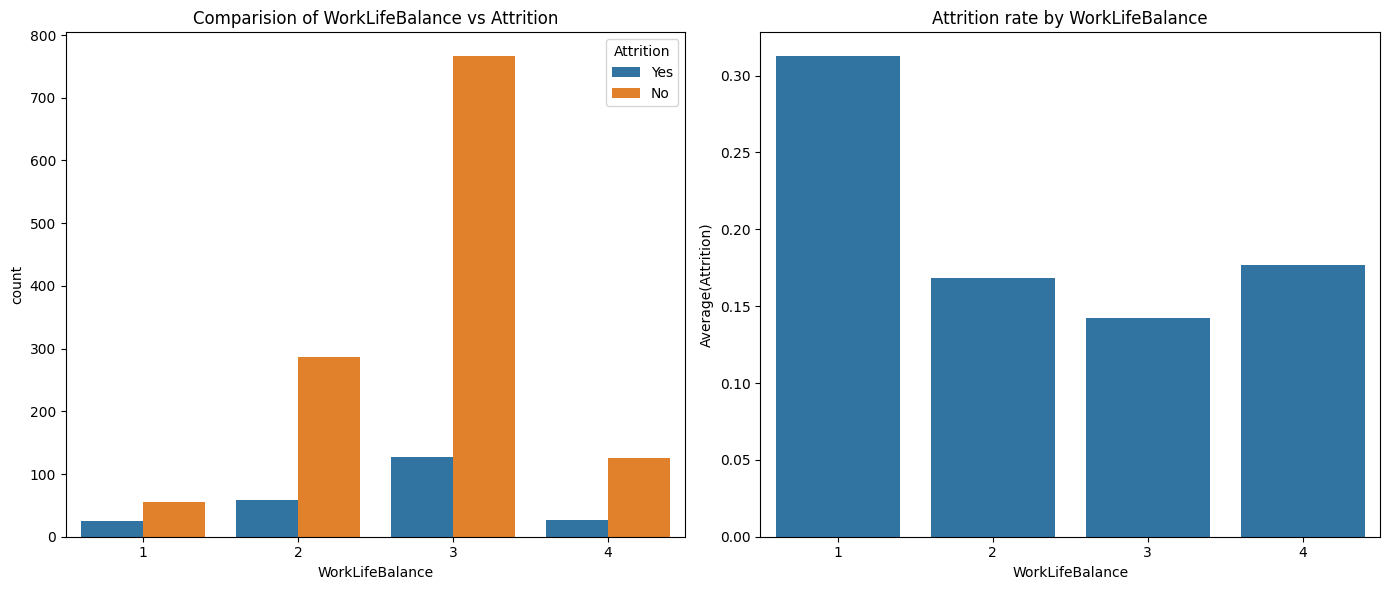

In [712]:
CategoricalPlots(df,'WorkLifeBalance')

The people who rated as Bad WorkLifeBalance have left the company.

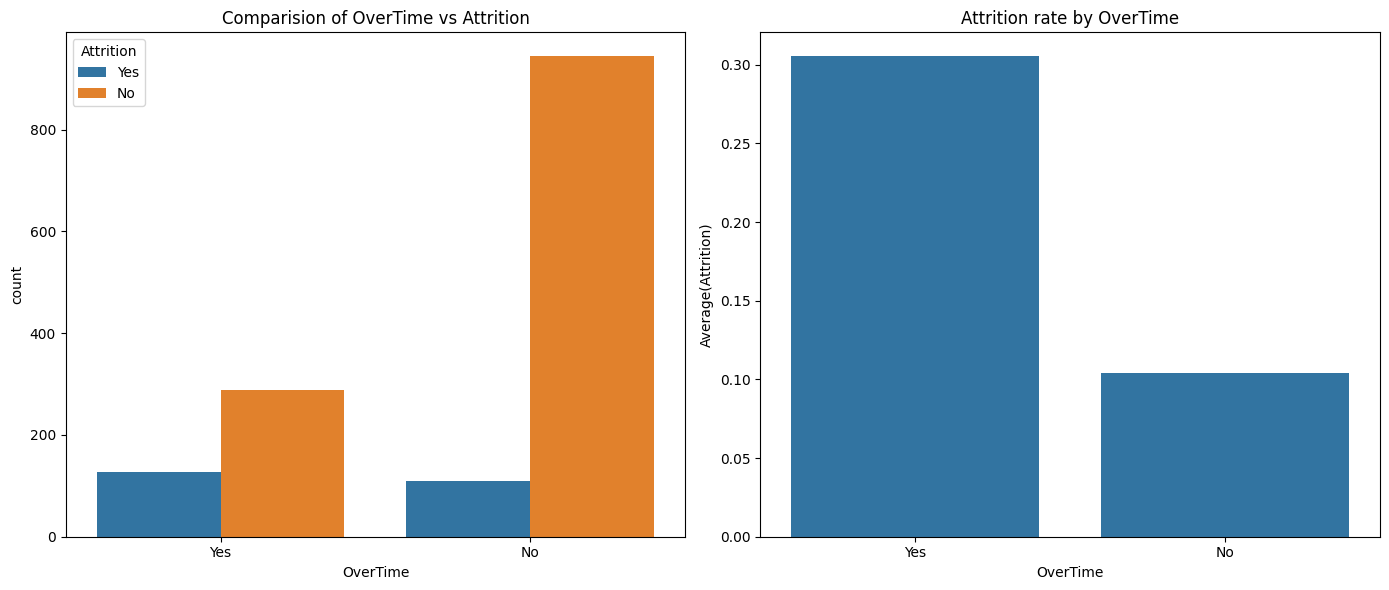

In [713]:
CategoricalPlots(df,'OverTime')

Employee's who worked overtime has left the company.

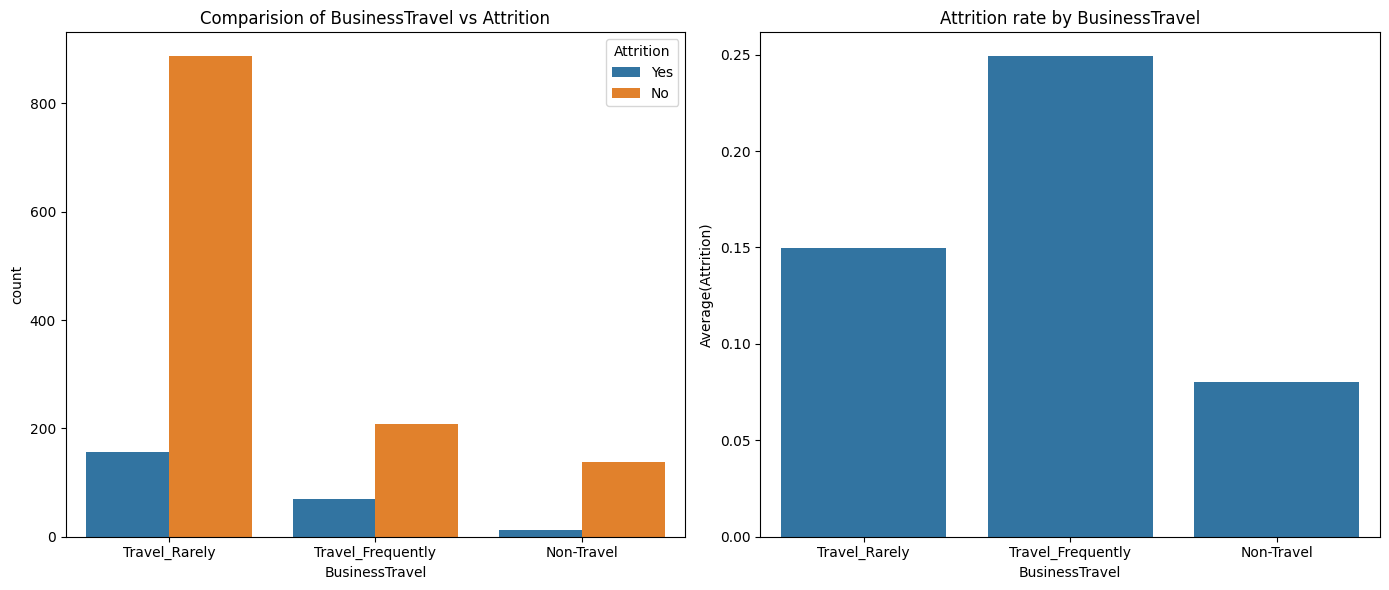

In [714]:
CategoricalPlots(df,'BusinessTravel')

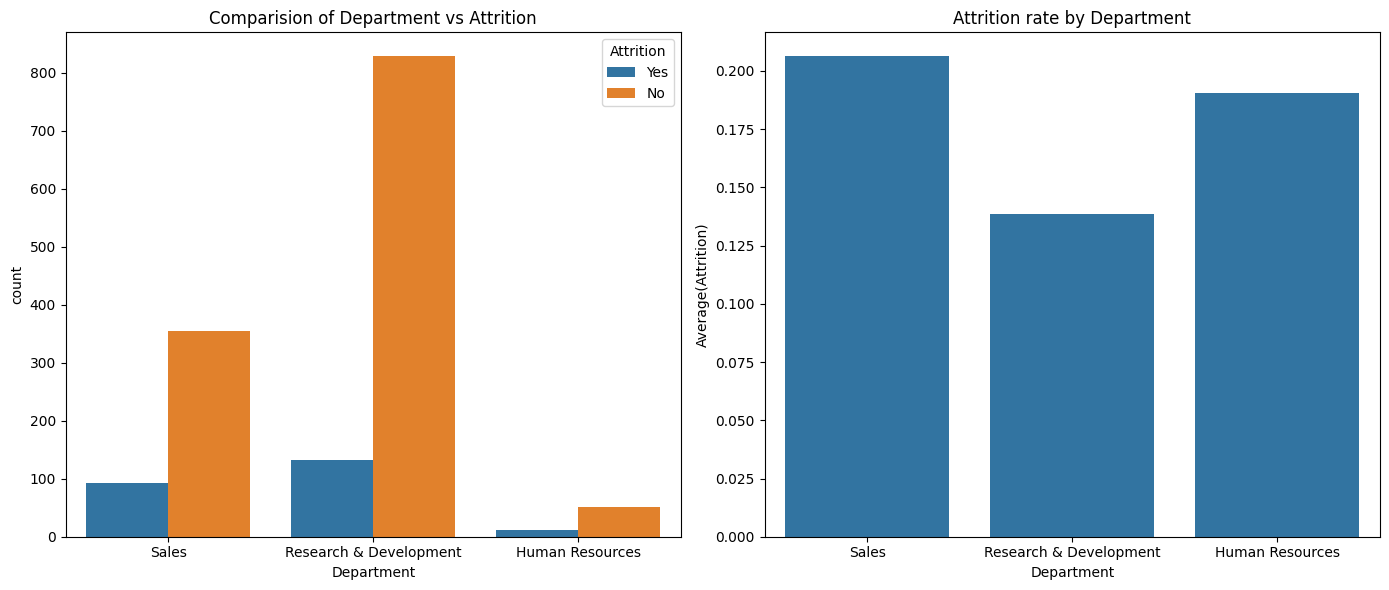

In [715]:
CategoricalPlots(df,'Department')

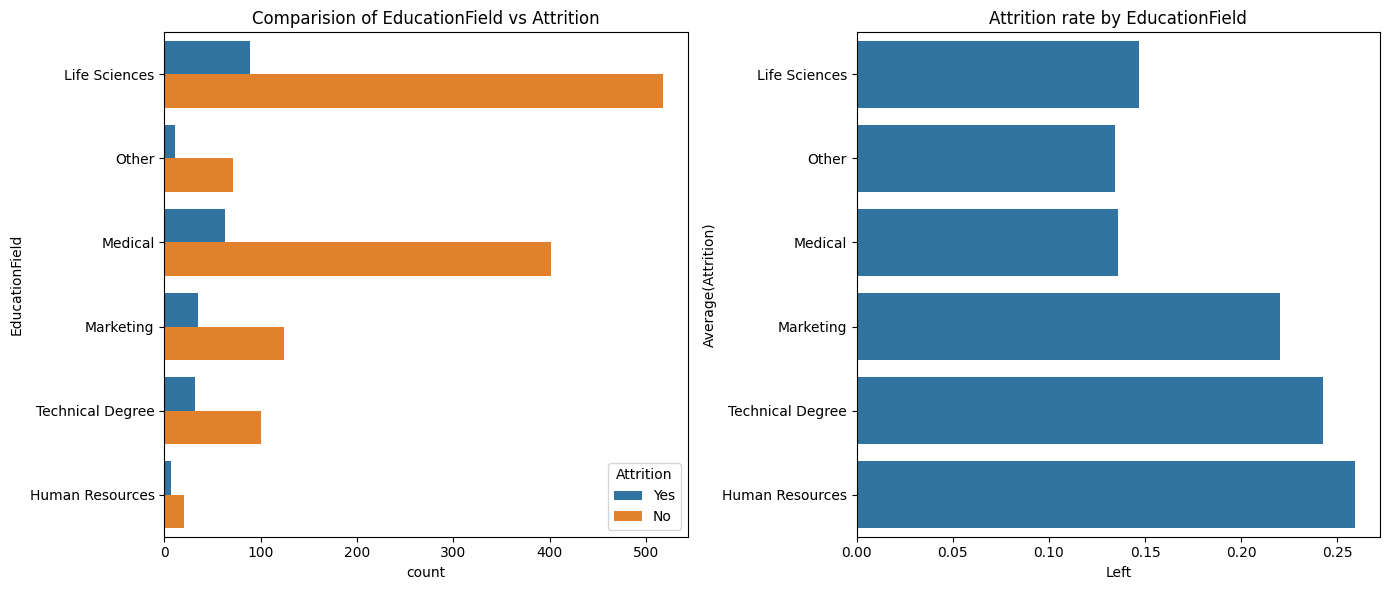

In [716]:
CategoricalPlots(df,'EducationField',invert_axis=True)

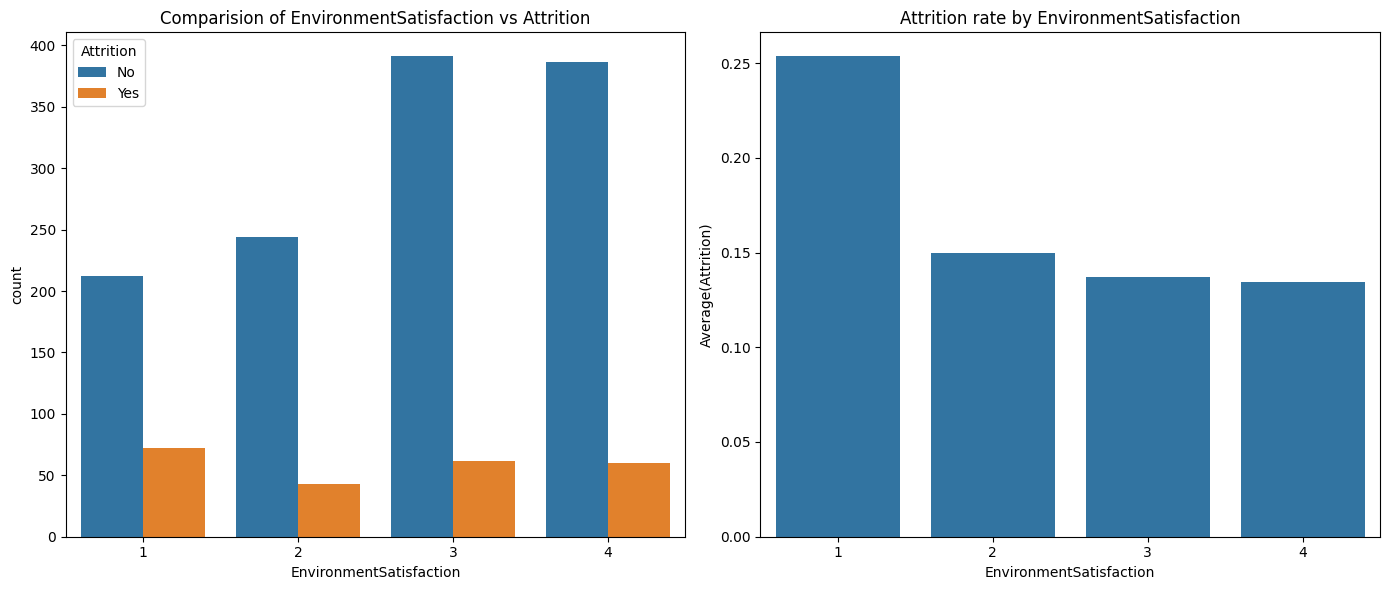

In [717]:
CategoricalPlots(df,'EnvironmentSatisfaction')

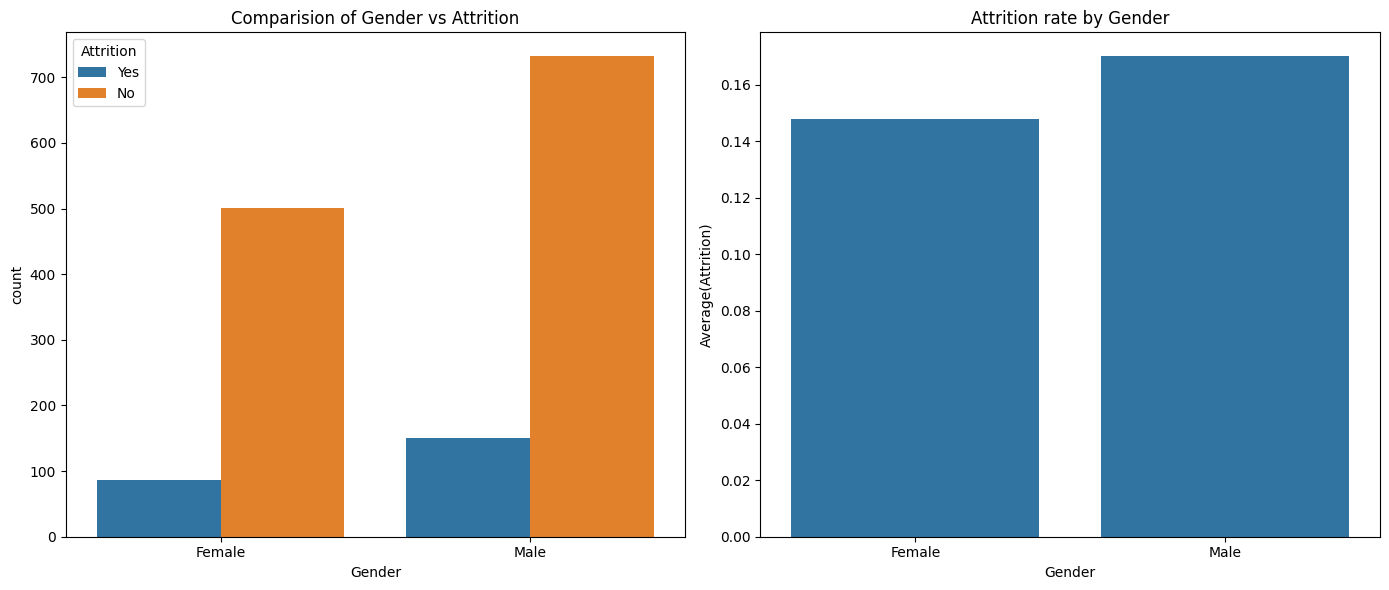

In [718]:
CategoricalPlots(df,'Gender')

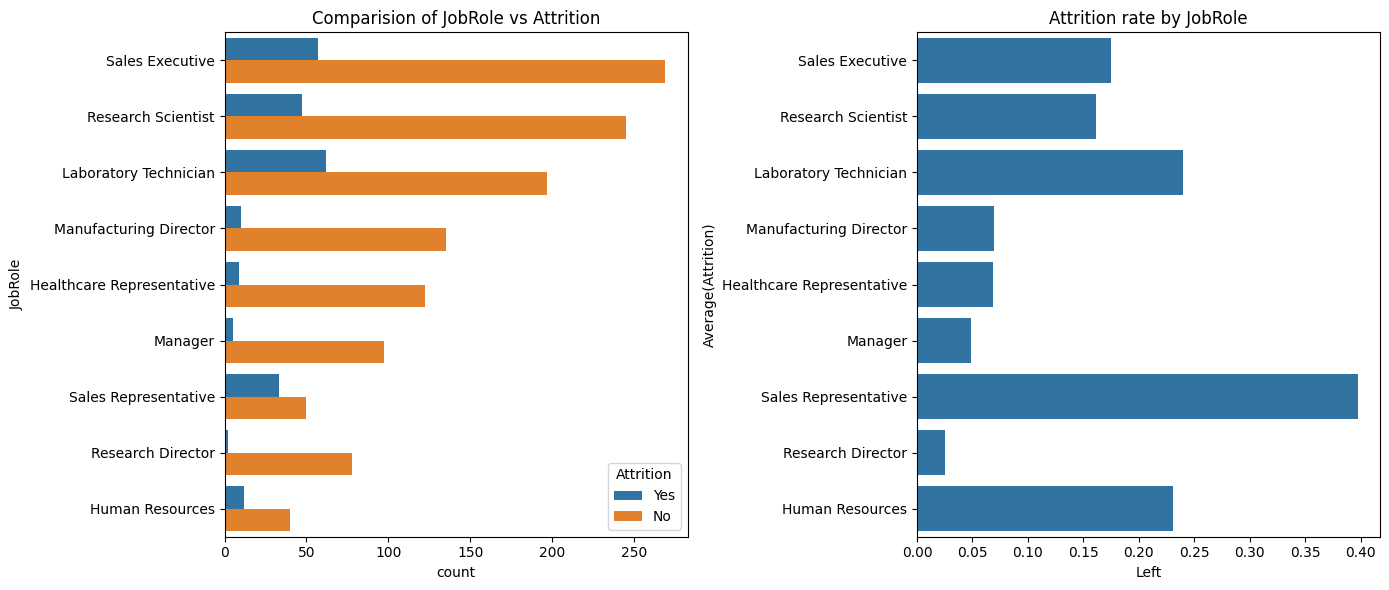

In [719]:
CategoricalPlots(df,'JobRole',invert_axis=True)

People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates.

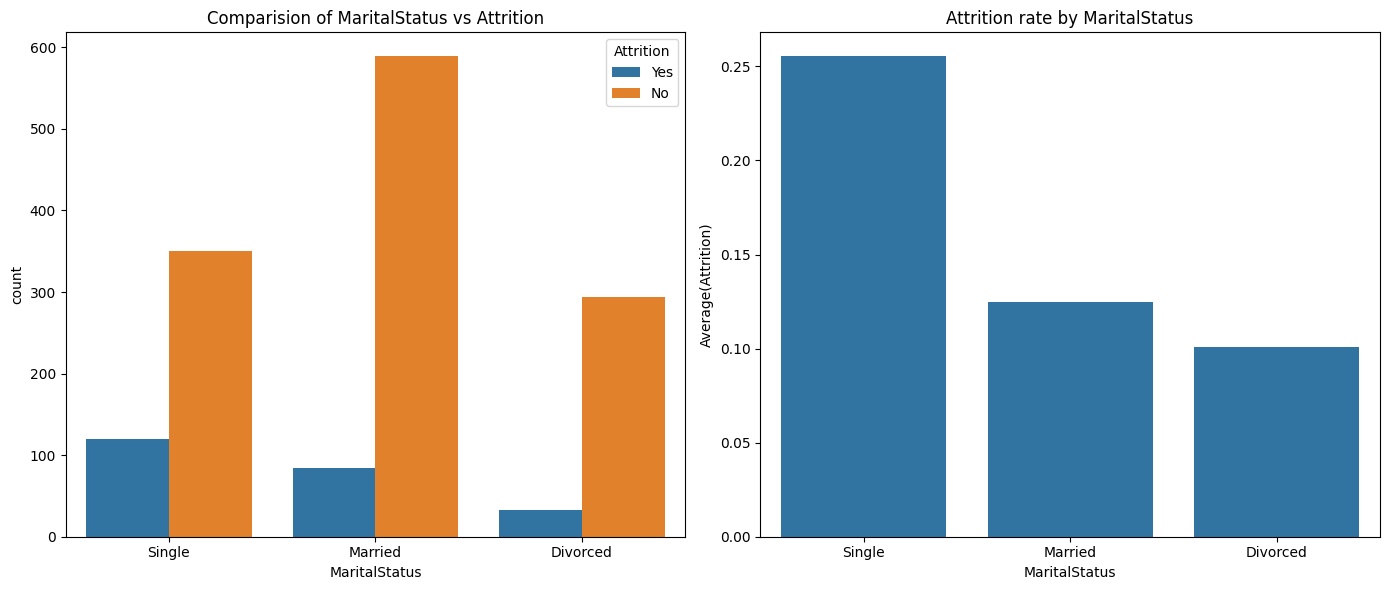

In [720]:
CategoricalPlots(df,'MaritalStatus')

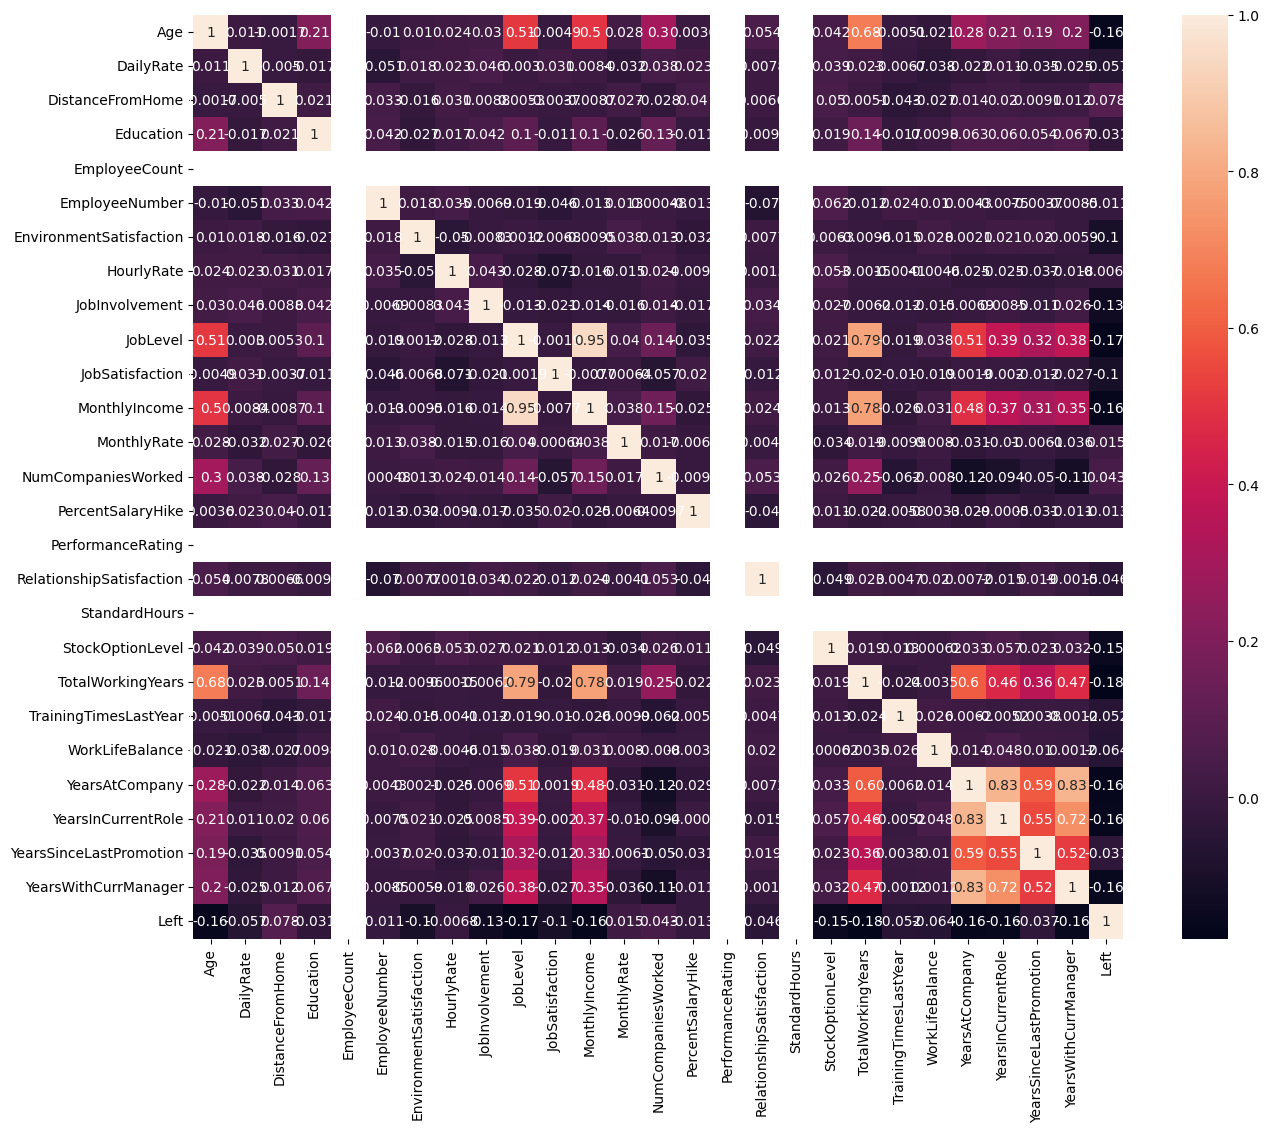

In [721]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(),annot=True)
plt.show()

In [722]:
df[numerical_cols].corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Left
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.041546,0.678402,-0.005125,-0.021490,0.278548,0.210424,0.190525,0.201551,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.039247,0.023059,-0.006739,-0.037848,-0.021956,0.010869,-0.035150,-0.024639,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.049859,0.005074,-0.043094,-0.026556,0.014240,0.020127,0.009076,0.012213,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018620,0.144030,-0.017294,0.009819,0.062616,0.060498,0.054477,0.067225,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.061938,-0.011882,0.023875,0.010309,0.004312,-0.007529,-0.003683,-0.008474,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.006266,-0.009622,-0.015449,0.027627,0.002076,0.021458,0.019958,-0.005938,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.053371,-0.001538,-0.004073,-0.004607,-0.025113,-0.024999,-0.037196,-0.018328,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.026526,-0.006167,-0.011778,-0.014617,-0.006860,0.008478,-0.011254,0.026428,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.020512,0.786734,-0.018558,0.037818,0.506163,0.385201,0.315214,0.377270,-0.169105


**Drop unecessary columns**

In [723]:
print(df['EmployeeCount'].unique())
print(df['PerformanceRating'].unique())
print(df['Over18'].unique())
print(df['StandardHours'].unique())

df = df.drop(['EmployeeCount','PerformanceRating','Over18','StandardHours','EmployeeNumber','Left'],axis = 1)   # drop EmployeeNumber because has 1470 values not neccessary

[1]
[3.]
['Y']
[80]


# **Data Preprocessing**

In [724]:
# Encode the categorical columns

from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# **Data Splitting & Scaling**

In [725]:
# Split the data

from sklearn.model_selection import train_test_split

X = df.drop(columns='Attrition')
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [726]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Development**

In [727]:
# Train LogisticRegression model

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


# Predictions
y_pred = lr_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate model
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.8979591836734694
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       255
           1       0.70      0.41      0.52        39

    accuracy                           0.90       294
   macro avg       0.81      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294

Confusion Matrix :
 [[248   7]
 [ 23  16]]


In [728]:
# Create a dataframe with actual values and predictions
pred = pd.DataFrame({
    "actual": y_test.values,
    "predicted": lr_model.predict(X_test),
    "predicted_prob": lr_model.predict_proba(X_test)[:, 1],  # Probability of attrition (1)
})

# Display few rows
pred

,actual,predicted,predicted_prob
0,0,0,0.080769
1,0,0,0.008650
2,1,0,0.156100
3,0,0,0.012549
4,0,0,0.031568
...,...,...,...
289,0,0,0.028641
290,0,0,0.063395
291,0,0,0.104513
292,0,0,0.057121


In [729]:
# Train XGBClassifier model

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate model
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.8673469387755102
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294

Confusion Matrix :
 [[246   9]
 [ 30   9]]


In [730]:
# Train GradientBoostingClassifier model

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate model
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.8707482993197279
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.53      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294

Confusion Matrix :
 [[247   8]
 [ 30   9]]


# **Feature Importance Analysis**

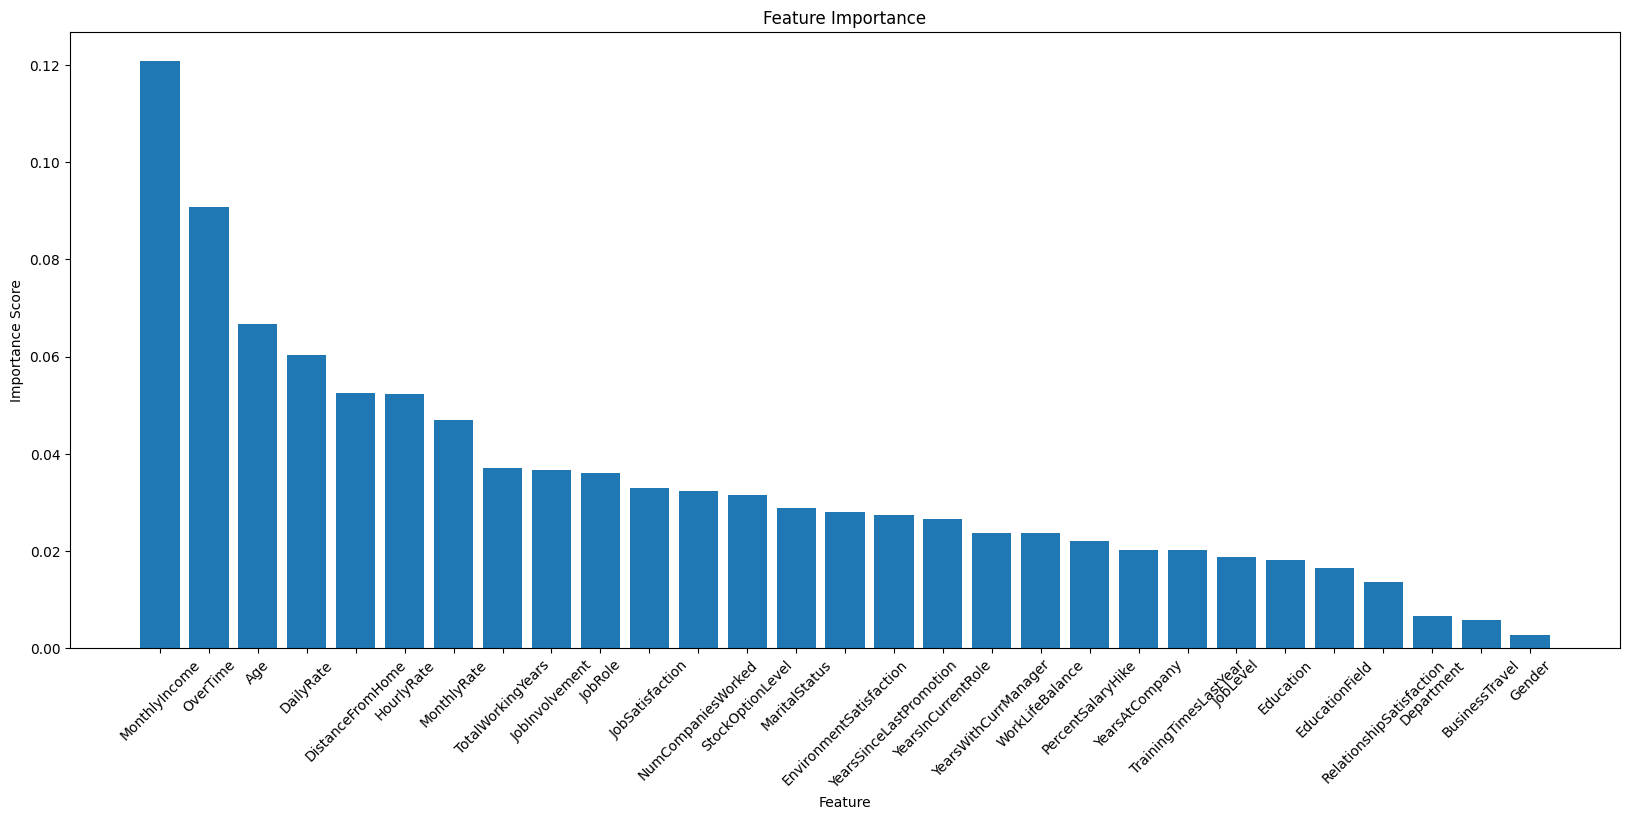

In [731]:
# Get feature importance
importances = gb_model.feature_importances_
feature_names = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 8))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

# **Conclusion**

**1. Key Findings**

Employees with low salaries, fewer years at the company, and poor work-life balance are more likely to leave.

Job role and department significantly influence attrition, with some roles experiencing higher turnover.

Overtime and high workload contribute to increased attrition rates.
Employees with low job satisfaction and fewer promotions are more likely to resign.

**2. Model Performance**

The LogisticRegression achieved high accuracy in predicting attrition.

Feature importance analysis showed that monthly income, job role, and years at the company are major factors.

**3. Business Recommendations**

✅ Increase employee engagement through career growth opportunities.

✅ Improve work-life balance by reducing excessive overtime.

✅ Offer competitive salaries and incentives to retain employees.

✅ Identify at-risk employees early and take proactive measures.